In [5]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Use the file path from your Google Drive
path = '/content/drive/My Drive/Colab Notebooks/Datasets/Bengaluru_House_Data.csv'
df = pd.read_csv(path)

# View DataFrame columns
df.columns


Mounted at /content/drive


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df.groupby('area_type', as_index=False).agg({'area_type': 'count'})
df.groupby("area_type")['area_type'].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [7]:
df1=df.drop(['area_type', 'availability', 'society','balcony'], axis="columns")
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df1.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [9]:
df2=df1.dropna()
df2.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [10]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df2["bhk"]=df2["size"].map(lambda x: int(x.split(" ")[0]))

<ipython-input-11-dd55ee6657ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bhk"]=df2["size"].map(lambda x: int(x.split(" ")[0]))


In [12]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df2["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
df2[df2["bhk"]>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df2["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df2[~df2["total_sqft"].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [18]:
def convert_sqft_num(x):
    tokens=x.split(" - ")
    if len(tokens)==2:
        return (float(tokens[0].strip()) + float(tokens[1].strip())) / 2
    try:
        return float(x)
    except:
        return None

In [19]:
df3=df2.copy()
df3["total_sqft"]=df3["total_sqft"].apply(convert_sqft_num)
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [20]:
df3.loc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
bhk,4


In [21]:
df4=df3.copy()
df4["price_per_sqft"]=df4["price"]*100000/df4["total_sqft"]
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [23]:
df4.location=df4.location.apply(lambda x: x.strip())
locatio_stat=df4.groupby("location")["location"].agg("count").sort_values(ascending=False)
locatio_stat

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [24]:
len(locatio_stat)

1293

In [25]:
len(locatio_stat[locatio_stat<=10])

1052

In [26]:
location_stats_lessthan_10=locatio_stat[locatio_stat<=10]
location_stats_lessthan_10

,location
location,
Basapura,10
1st Block Koramangala,10
Gunjur Palya,10
Kalkere,10
Sector 1 HSR Layout,10
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [27]:
len(df4.location.unique())

1293

In [28]:
df4.location=df4.location.apply(lambda x: 'other' if x in location_stats_lessthan_10 else x)
len(df4.location.unique())

242

In [29]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [30]:
df4.shape

(13246, 7)

In [31]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [32]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 7)

In [33]:
import pandas as pd
import numpy as np

def remove_pps_outlier(x):
    # Initialize df_out as an empty DataFrame
    df_out = pd.DataFrame()  # Create an empty DataFrame instance
    for key, subdf in x.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df6 = remove_pps_outlier(df5)
df6.shape

(10241, 7)

In [34]:
df6.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279
10240,other,4 BHK,3600.0,5.0,400.00,4,11111.111111


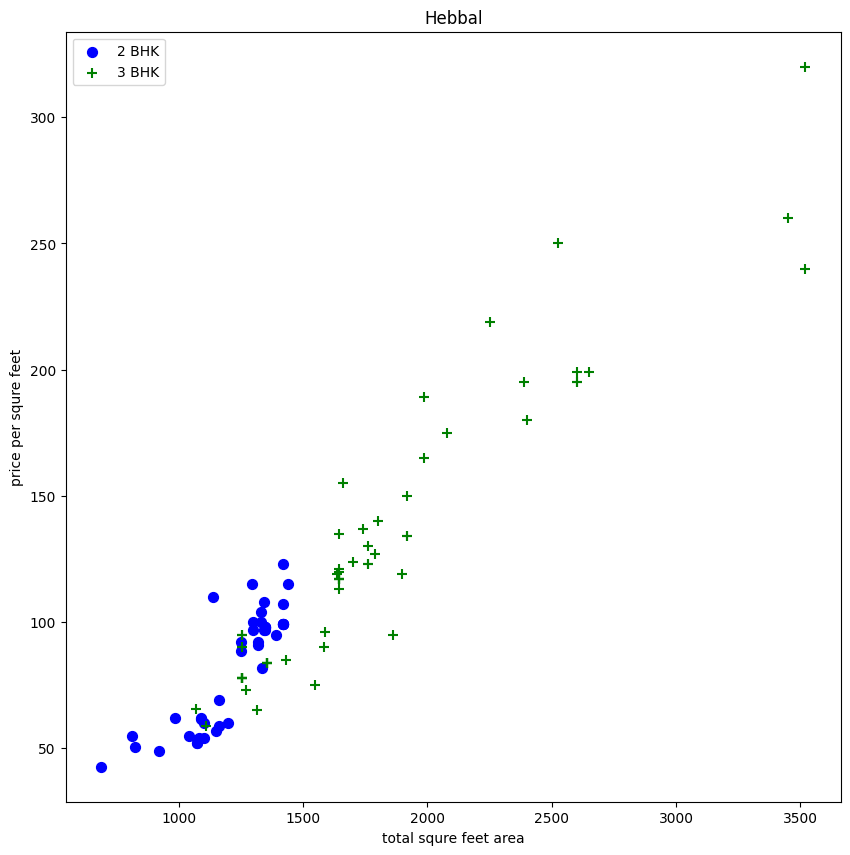

In [35]:
from matplotlib import pyplot as plt
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize']=(10,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color="blue", label="2 BHK", s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker='+', color="green", label="3 BHK", s=50)
    plt.xlabel("total squre feet area")
    plt.ylabel("price per squre feet")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df6,"Hebbal")

In [36]:
def remove_bhk_outliers(x):
    exclude_indices=np.array([])
    for location, location_df in x.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft< (stats['mean'])]. index.values)
    return x.drop(exclude_indices, axis='index')
df7=remove_bhk_outliers(df6)
df7.shape

(7329, 7)

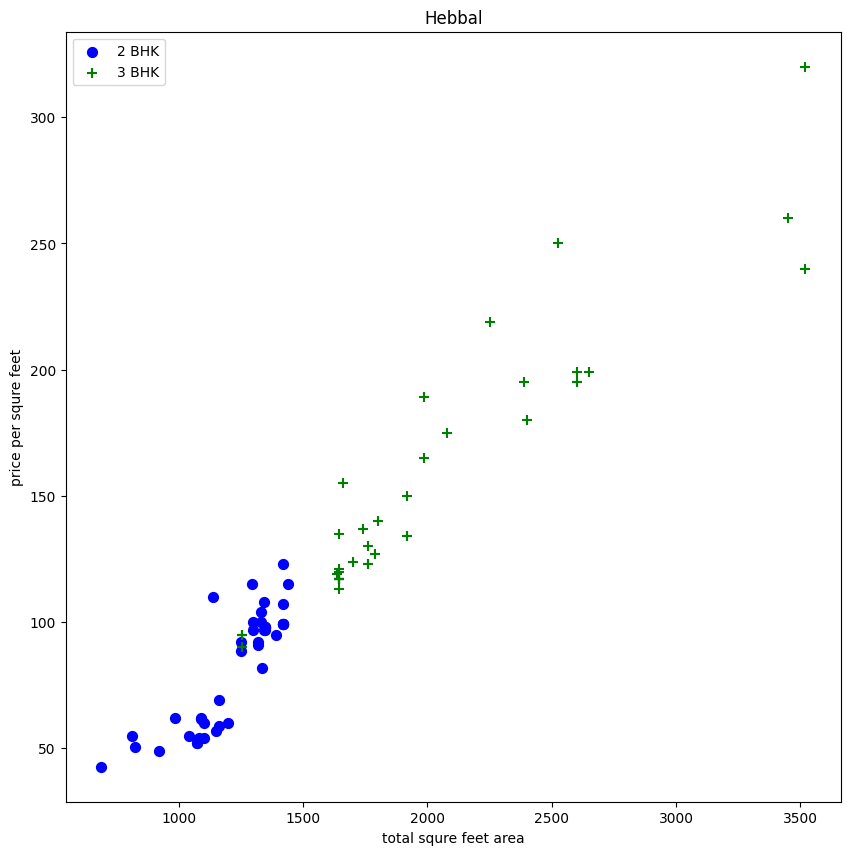

In [37]:
plot_scatter_chart(df7,"Hebbal")

Text(0, 0.5, 'Count')

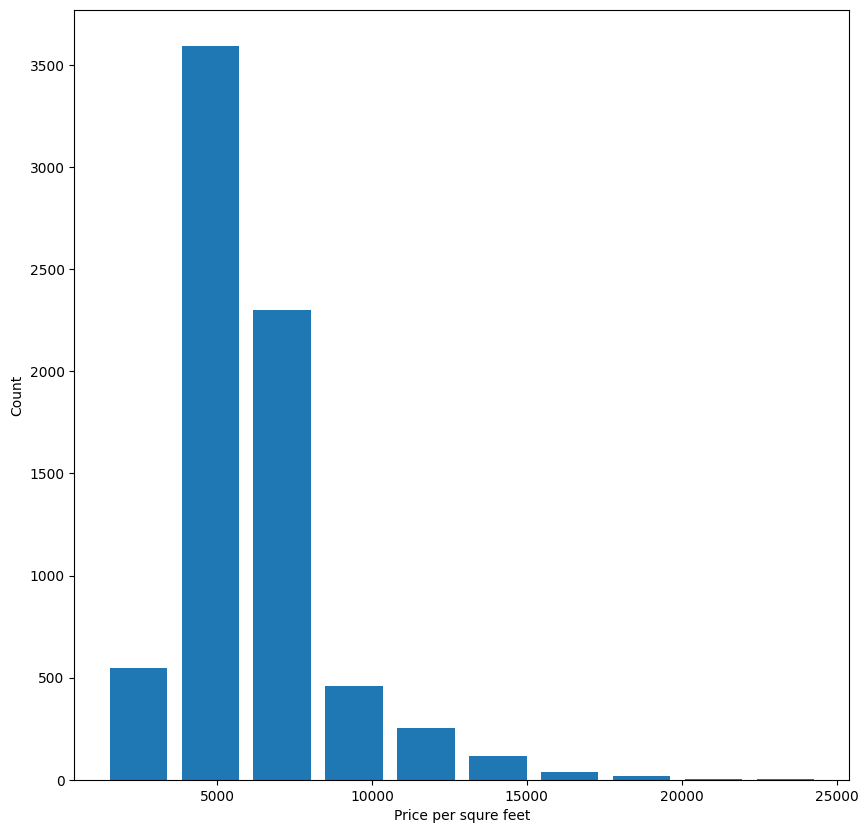

In [38]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(10,10)
plt.hist(df7.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per squre feet")
plt.ylabel("Count")

In [39]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [40]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

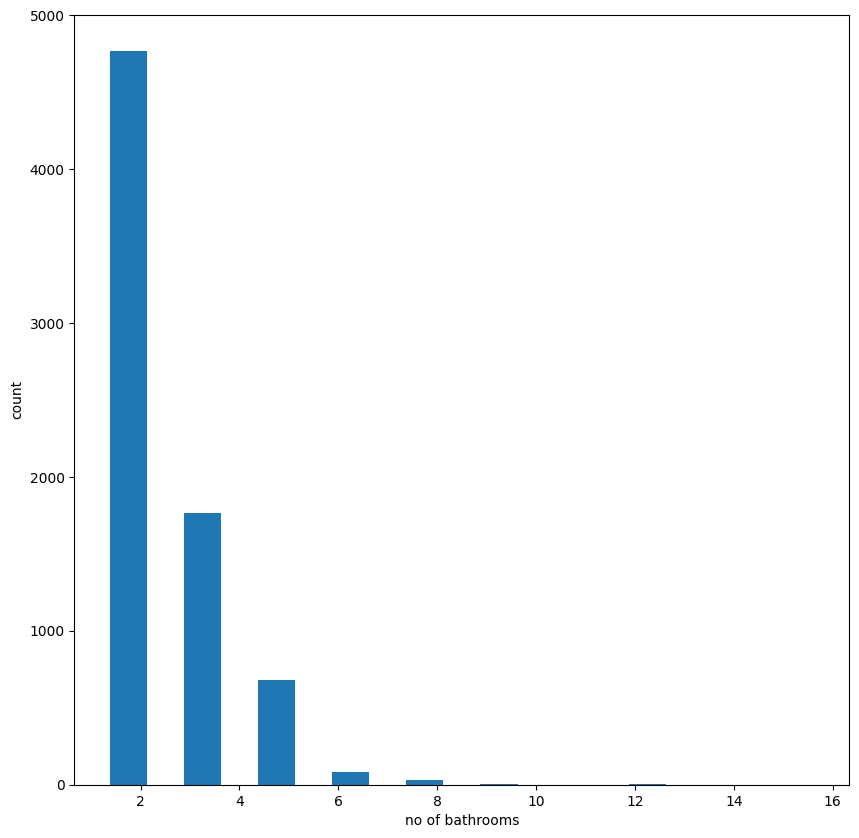

In [41]:
plt.hist(df7.bath, rwidth=0.5)
plt.xlabel("no of bathrooms")
plt.ylabel("count")

In [42]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [43]:
df8=df7[df7.bath<df7.bhk+2]
df8.shape

(7251, 7)

In [44]:
df9=df8.drop(["size","price_per_sqft" ], axis=1)
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [45]:
dummies=pd.get_dummies(df9.location).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df10=pd.concat([df9, dummies.drop('other', axis=1)], axis=1)
df10.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df11=df10.drop("location", axis=1)
df11.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df11.shape

(7251, 245)

In [49]:
X=df11.drop("price", axis=1)
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y=df11.price
y.head()

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [52]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression().fit(X_train, y_train)

In [53]:
clf.score(X_train, y_train)

0.8541850010771193

In [54]:
clf.score(X_test, y_test)

0.8452277697874329

In [55]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

rs = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)
cross_val_score(clf,X, y, cv=rs)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd # Make sure pandas is imported

def find_best_model_using_gridsearchcv(X,y):
    algos={
        "linear_regression":{
            "model":LinearRegression(),
            "params":{
                # "normalize":[True, False]  <- Removed the normalize parameter
                "fit_intercept": [True, False],  # <- Added alternative parameters
                "copy_X": [True, False],
                "positive": [True, False]
                #Consider adding 'n_jobs' for parallel processing if your data is large
            }
        },
        "lasso": {
            "model": Lasso(),
            "params": {
            "alpha": [1, 2],
            "selection": ['random', 'cyclic']
            }
        },
        "decision_tree": {
        "model": DecisionTreeRegressor(),
        "params": {
        "criterion": ['mse', 'friedman_mse'],
        "splitter": ['best', 'random']
            }
        }

        }
    scores =[]
    cv = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model":algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', "best_params"])
find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

,model,best_score,best_params
0,linear_regression,0.823261,"{'copy_X': True, 'fit_intercept': False, 'posi..."
1,lasso,0.698000,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.696931,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [57]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [65]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [59]:
def predict_price(location, sqft,bath, bhk):
    loc_index=np.where(X.columns==location)[0][0]

    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return clf.predict([x])[0]

In [66]:
predict_price("1st Phase JP Nagar", 1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677188148

In [67]:
predict_price("1st Phase JP Nagar", 1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395214823

In [68]:
predict_price("Indira Nagar", 1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484006715

In [69]:
predict_price("Indira Nagar", 1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.5843020203339

In [70]:
import pickle
with open("bangalore_price_model.pickle","wb") as f:
    pickle.dump(clf, f)

In [72]:
import json
columns={
    "data_columns" : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))